In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys, os
from scipy.interpolate import interp1d
from scipy.optimize import minimize
sys.path.append('documents/BNL/jupyter/notebooks/calibrator')
os.environ['LUSEE_DRIVE_DIR']='/home/anze/work/lusee/Drive/'
from algorithms import  Comb, Calibrator
import pickle

In [3]:
Asfix=np.load('Asfix.npy')
Ns=np.load('Ns.npy')
kar = np.load('kar.npy')

In [4]:
amplar = [1]
res=[]
for fac in amplar:
    comb=Comb(kar,response=fac*Asfix, noise=Ns)
    C = Calibrator(comb, alpha=0,max_shift=0.01, add_noise=True)
    C.analyze_data(alpha_start=-1.2,tmax=39, force_detect=2)
    C.cross_correlate()
    res.append(C.results)

/home/anze/Dropbox/work/lusee/notebooks/calibrator/algorithms.py:183: RuntimeWarning: invalid value encountered in log10
  SNRdB = np.log10(SNR2-420)*10
/home/anze/Dropbox/work/lusee/notebooks/calibrator/algorithms.py:100: RuntimeWarning: invalid value encountered in scalar divide
  ofs = FD/SD


2.0106192982974676e-06


[]

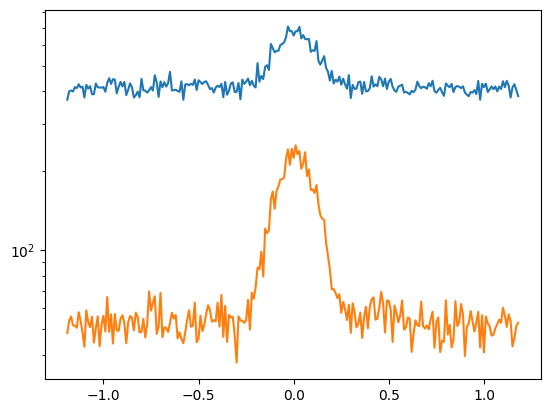

In [5]:

for r in res:
    plt.plot(r['alphadet'],r['SNR2'])
    plt.plot(r['alphadet'],r['SNR2w'])
plt.semilogy()

[]

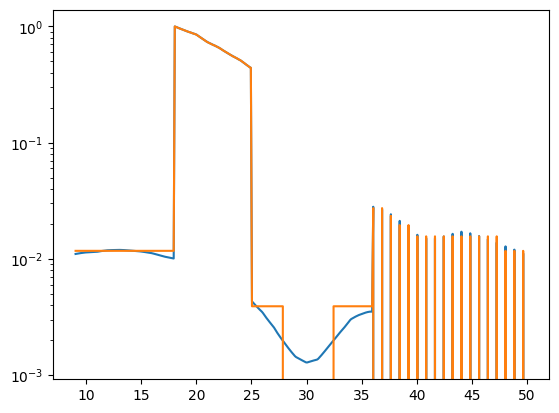

In [9]:
plt.plot(comb.fcomb/1e6,comb.weights)
plt.plot(comb.fcomb/1e6,(comb.weights*256+0.5).astype(int)/256)
plt.semilogy()

In [13]:
((comb.weights*256).astype(int)>0).sum()

183

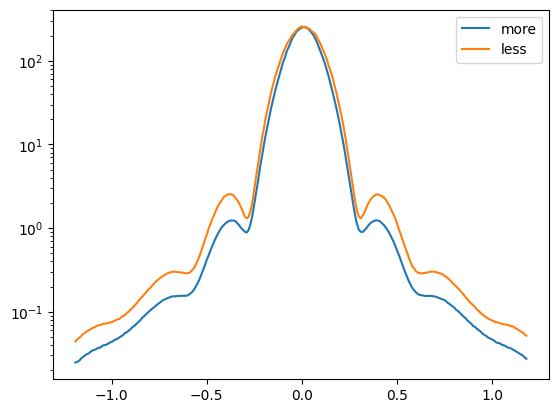

In [36]:
m1, m2 = res[-1], res[-2]
plt.plot(m1['alphadet'],m1['SNR2']/amplar[-1]**2,label='more')
plt.plot(m1['alphadet'],m2['SNR2']/amplar[-2]**2,label='less')
plt.semilogy()
plt.legend()

[]

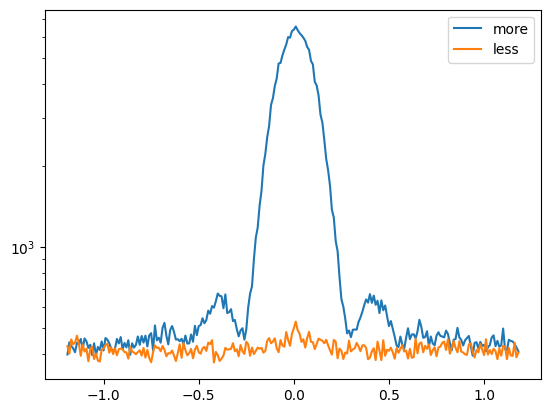

In [47]:
m1, m2 = res[8], res[3]
plt.plot(m1['alphadet'],m1['SNR2'],label='more')
plt.plot(m1['alphadet'],m2['SNR2'],label='less')
plt.legend()
plt.semilogy()

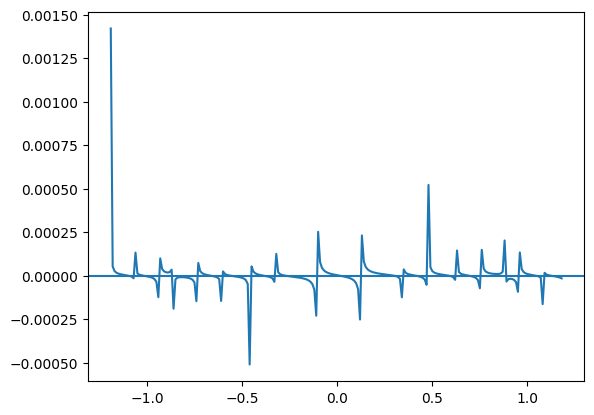

In [55]:
m=res[-1]
plt.plot(m['alphadet'],m['FD']/m['SD'])
plt.axhline(0)